## Import Packages & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# import downloaded data from Kaggle
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', parse_dates=['date'], infer_datetime_format=True, decimal=',')
features = df.columns.tolist()

In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
df.shape

(737453, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

**Comments**:
- The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality.) 
- The last two columns are the final iron ore pulp quality measurement from the lab.
- Target is to predict the last column, which is the % of silica in the iron ore concentrate.


## Data Pre-Processing & EDA

In [6]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data[missing_data['Total']!=0])

,Total,Percent


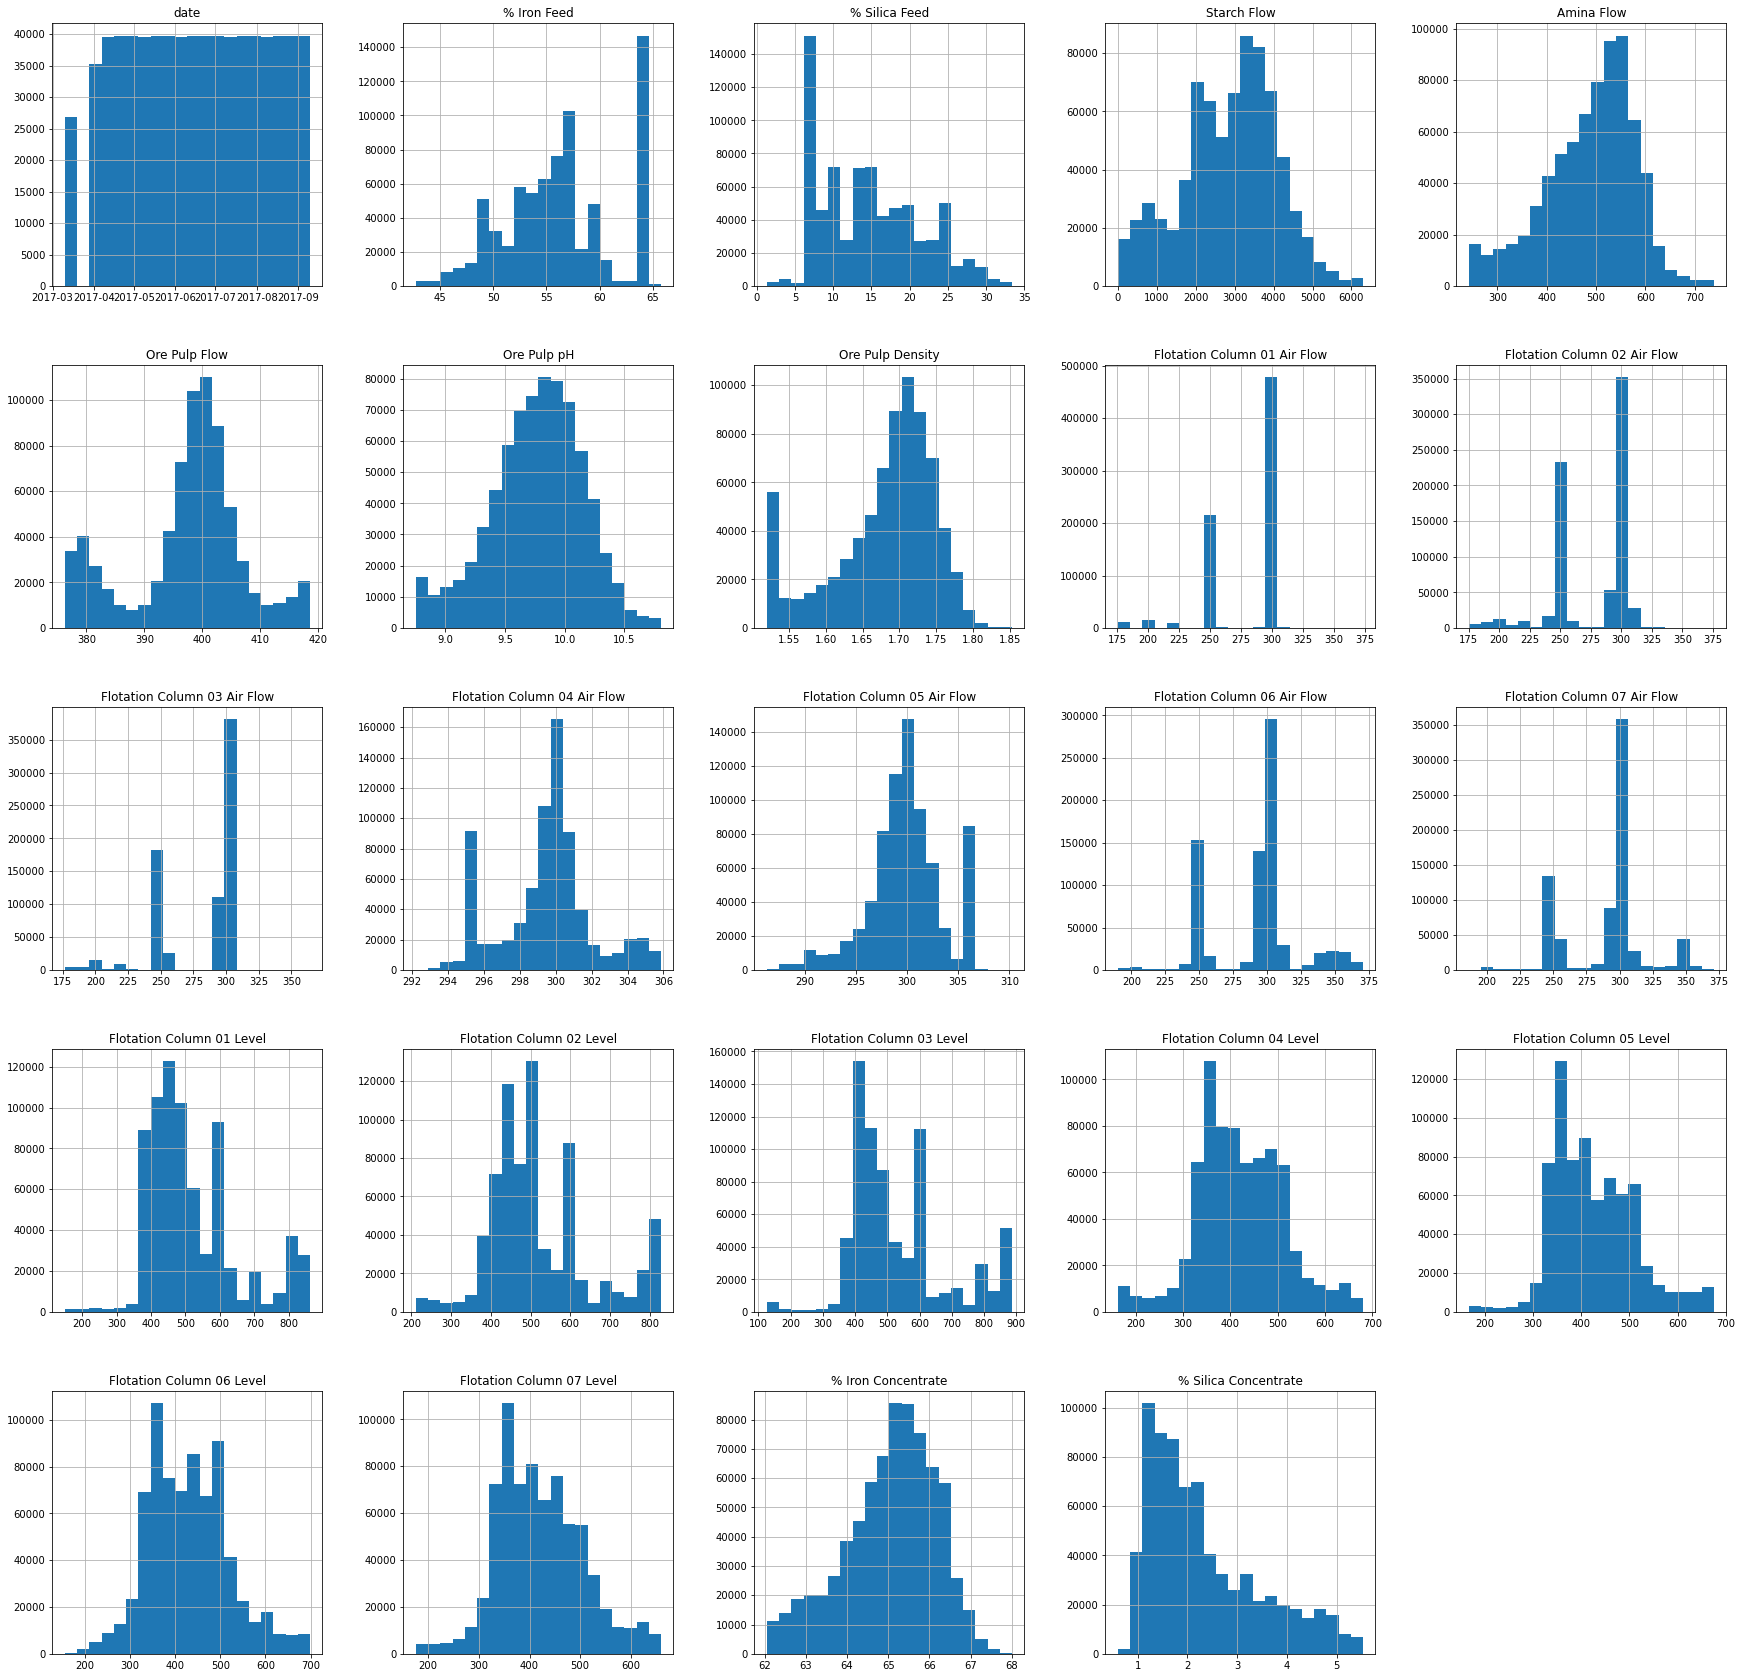

In [7]:
#look at distribution of df
hist = df.hist(figsize=(30,30),bins=20)

In [8]:
df.groupby(by='date').size()

date
2017-03-10 01:00:00    174
2017-03-10 02:00:00    180
2017-03-10 03:00:00    180
2017-03-10 04:00:00    180
2017-03-10 05:00:00    180
                      ... 
2017-09-09 19:00:00    180
2017-09-09 20:00:00    180
2017-09-09 21:00:00    180
2017-09-09 22:00:00    180
2017-09-09 23:00:00    180
Length: 4097, dtype: int64

**Comments:**
- Columns 1,2,22,23 are measured every hour
- The rest of the columns are measured every 20 seconds 

In [9]:
# resample the dataset so all 20 second columns are averaged out and each data entry is hourly
df2 = df.groupby(by='date').mean().reset_index()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4097 non-null   datetime64[ns]
 1   % Iron Feed                   4097 non-null   float64       
 2   % Silica Feed                 4097 non-null   float64       
 3   Starch Flow                   4097 non-null   float64       
 4   Amina Flow                    4097 non-null   float64       
 5   Ore Pulp Flow                 4097 non-null   float64       
 6   Ore Pulp pH                   4097 non-null   float64       
 7   Ore Pulp Density              4097 non-null   float64       
 8   Flotation Column 01 Air Flow  4097 non-null   float64       
 9   Flotation Column 02 Air Flow  4097 non-null   float64       
 10  Flotation Column 03 Air Flow  4097 non-null   float64       
 11  Flotation Column 04 Air Flow  

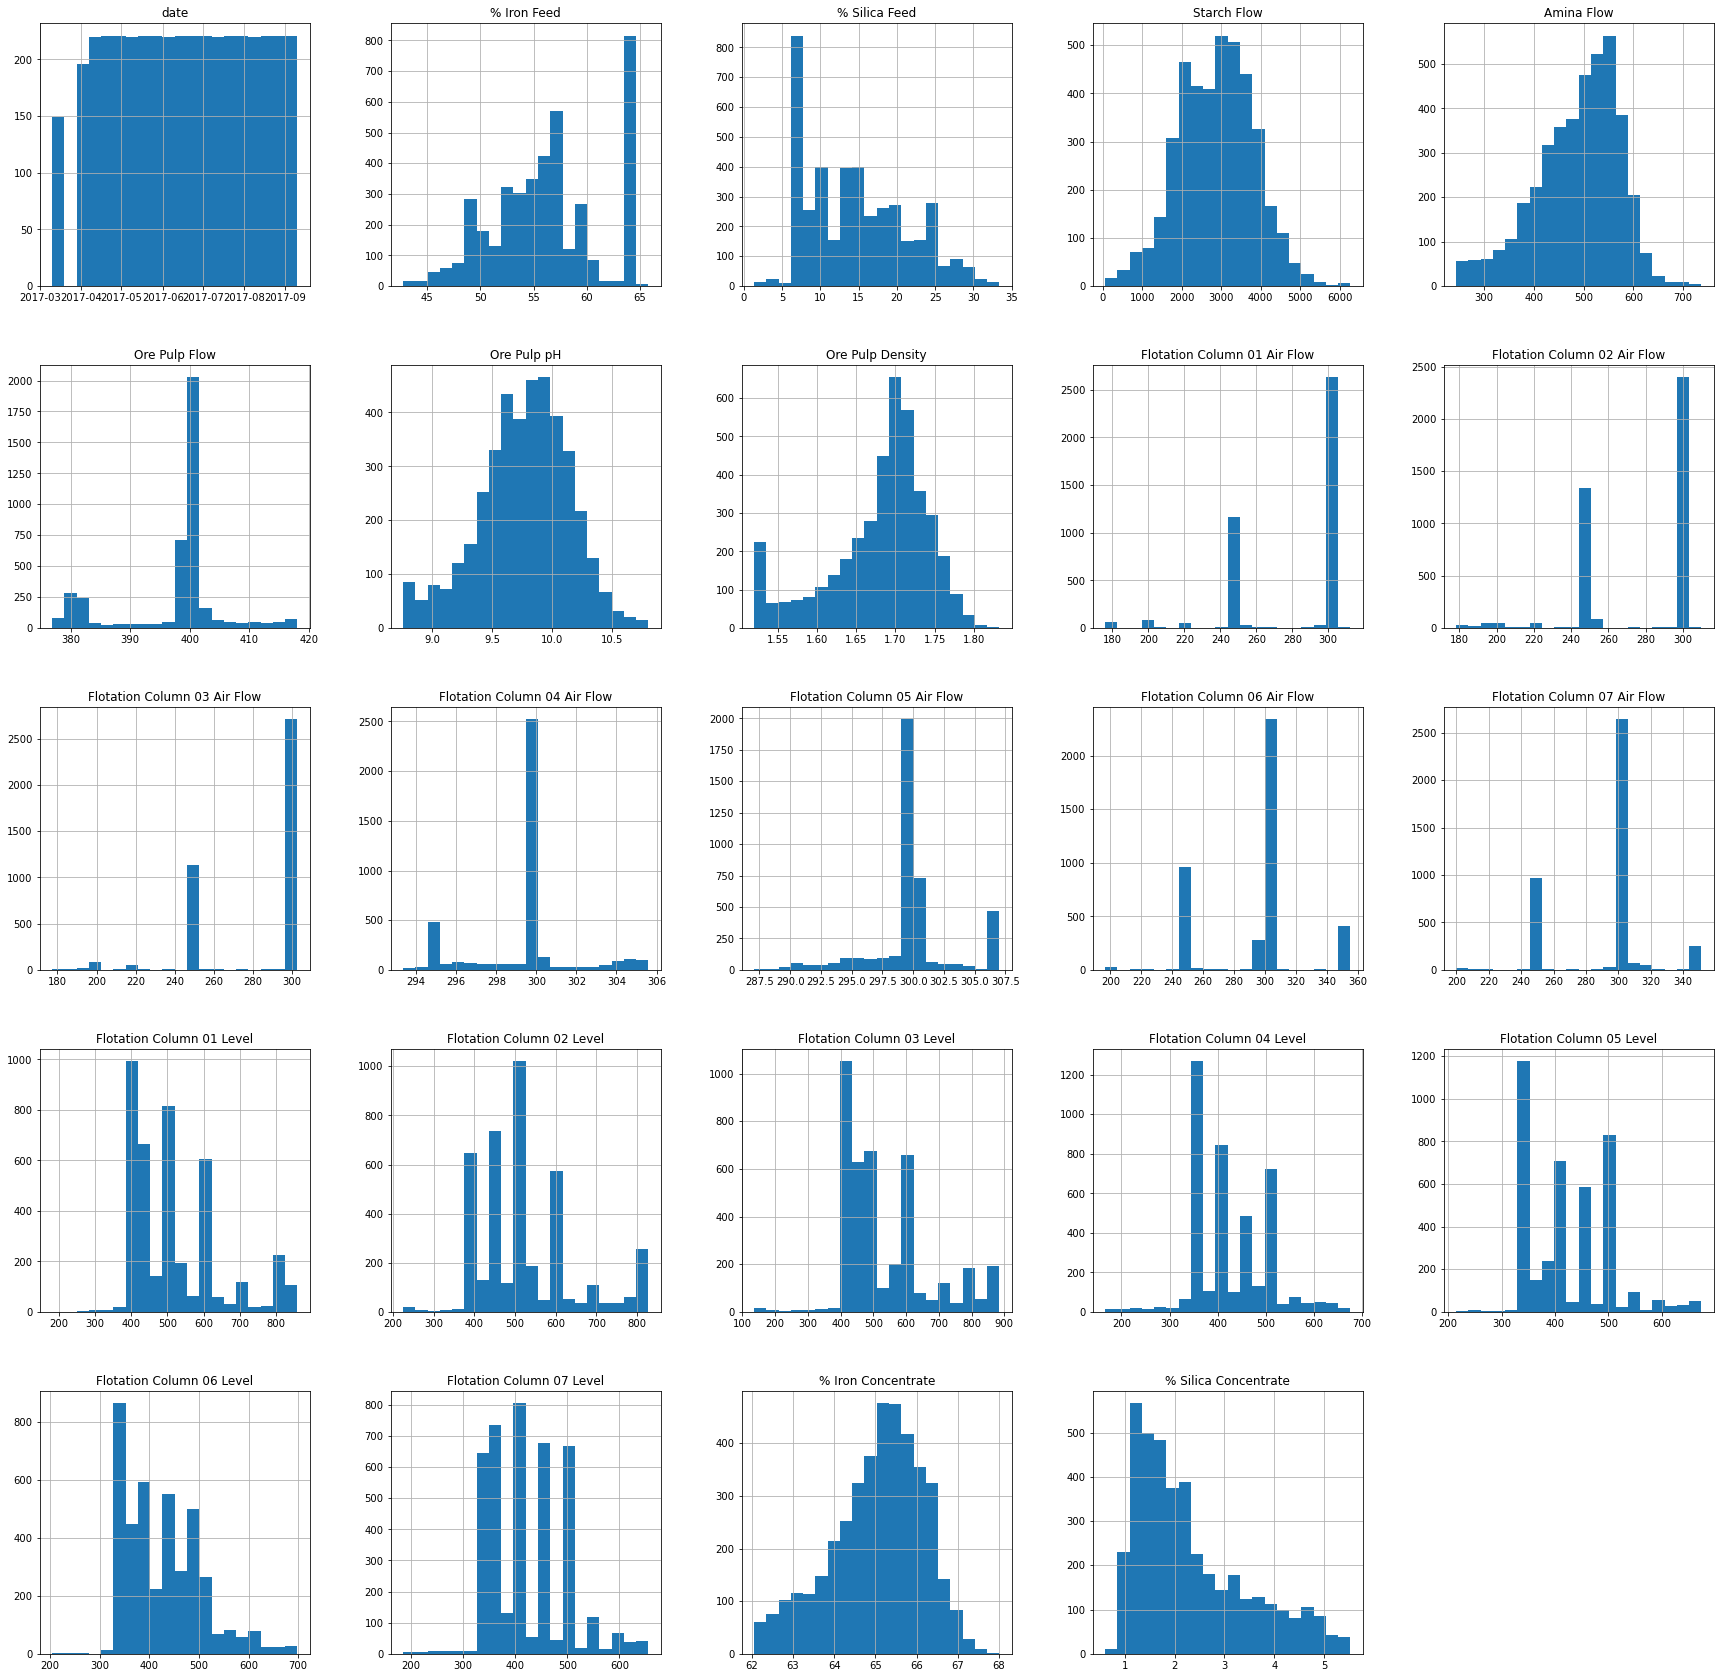

In [11]:
#look at distribution of df2
hist = df2.hist(figsize=(30,30),bins=20)

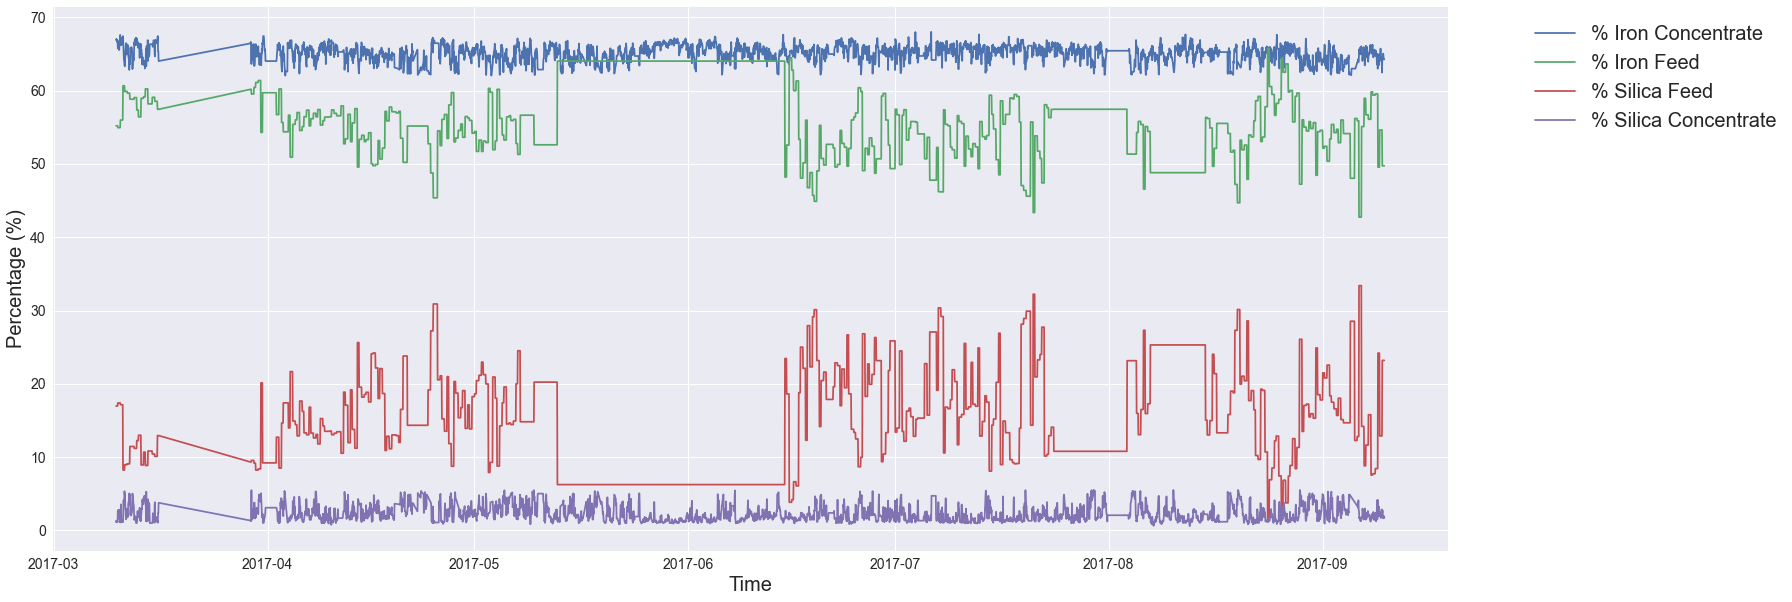

In [12]:
#plot feed and concentrate grades over time

# Create figure and plot space
plt.style.use('seaborn')
fig, axes = plt.subplots(figsize=(25,10))

# Add x-axis and y-axis

axes.plot(
    df2['date'],
    df2['% Iron Concentrate'],
    label= '% Iron Concentrate'
)

axes.plot(
    df2['date'],
    df2['% Iron Feed'],
    label= '% Iron Feed'
)

axes.plot(
    df2['date'],
    df2['% Silica Feed'],
    label= '% Silica Feed'    
)

axes.plot(
    df2['date'],
    df2['% Silica Concentrate'],
    label= '% Silica Concentrate'
)

# Set title and labels for axes
axes.set(
    xlabel='Time',
    ylabel='Percentage (%)'
)

axes.legend(loc='upper left',bbox_to_anchor=(1.05, 1), prop={'size': 20}) #No overlapping plot elements

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

plt.show()

**Comments:**
- From the graph above it can be seen that data was poorly collected during March 2017. After checking on Kaggle it seems there was a power outtage at the plant during this time. In order to prevent any corrupted data prior to 2017-03-29 12:00:00 will be removed
- It can also been seen that some of the data seems to be interporlated values. This is not an ideal situation for modelling, but since we already have a very limited dataset I will not remove any more values

In [13]:
# remove dates before 2017-03-29 12:00:00 and plot new time graph

df2 = df2.set_index(['date'])
df2 = df2.loc["2017-03-29 12:00:00":].reset_index()

display(df2.head())
display(df2.shape)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-29 12:00:00,60.18,9.34,1060.859297,379.836203,400.982539,9.527187,1.550374,200.035839,195.577700,...,249.992956,753.724247,726.559437,860.557818,477.349197,452.512522,478.219647,470.105547,66.44,1.36
1,2017-03-29 13:00:00,60.18,9.34,2034.926525,322.233975,400.468947,9.700679,1.532017,199.990122,195.106250,...,250.059711,848.675503,777.784437,869.419421,483.816131,469.448172,471.607075,462.665478,66.57,1.43
2,2017-03-29 14:00:00,60.18,9.34,1435.425811,474.656322,399.157083,9.687788,1.645200,200.019311,195.604928,...,250.111328,851.951492,776.293654,879.704989,456.147231,453.227000,447.708467,453.475667,66.64,1.33
3,2017-03-29 15:00:00,60.18,9.34,618.460387,396.377733,398.942522,9.851689,1.559929,199.940833,195.657094,...,250.028506,855.910630,780.369869,882.093896,449.410744,448.581506,450.697578,448.660094,66.41,1.27
4,2017-03-29 16:00:00,59.54,9.56,1367.502858,317.134072,400.836283,9.936163,1.530984,199.878922,196.162864,...,250.122067,851.603513,784.446084,884.840698,450.123050,451.774694,451.574422,449.406894,63.63,5.50


(3948, 24)

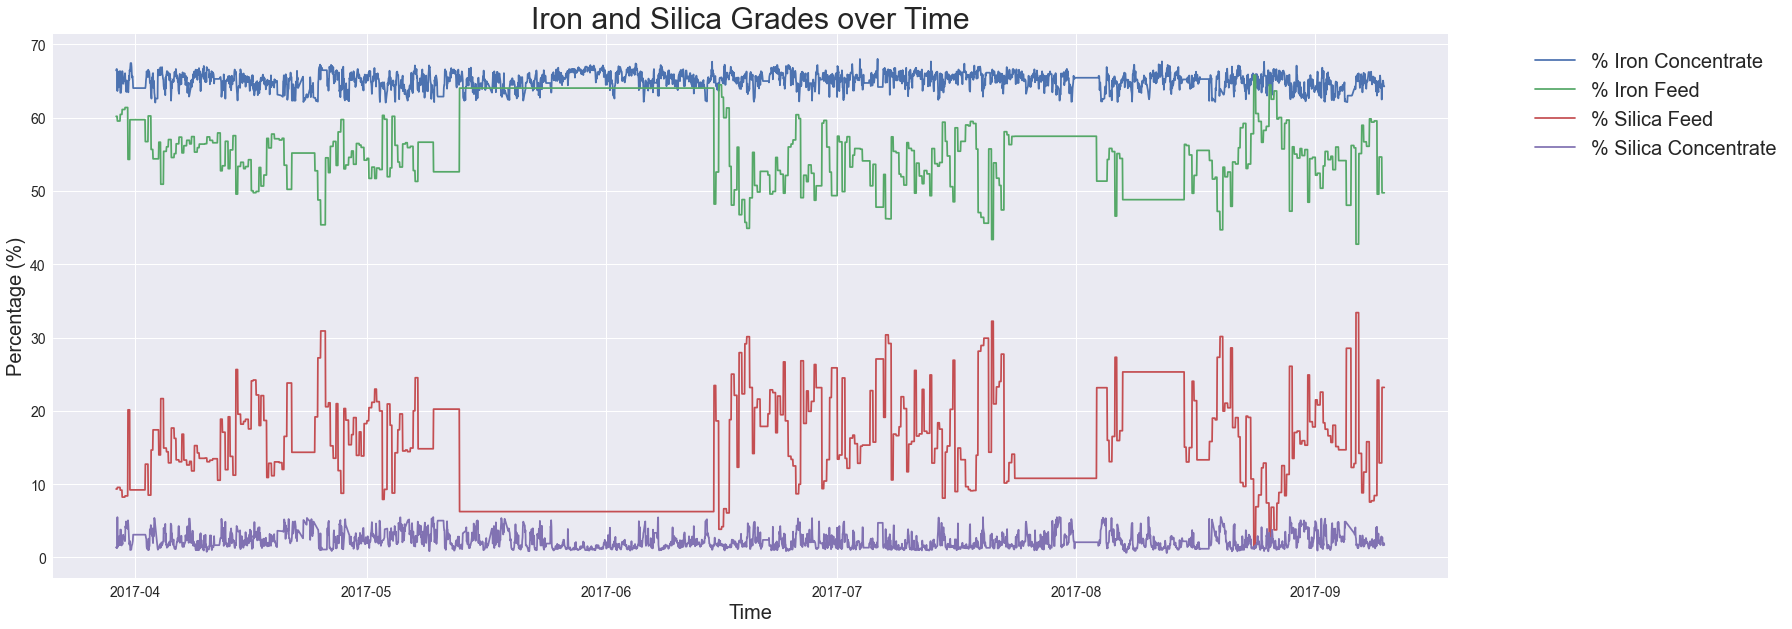

In [14]:
#plot feed and concentrate grades over time

# Create figure and plot space
plt.style.use('seaborn')
fig, axes = plt.subplots(figsize=(25,10))

# Add x-axis and y-axis

axes.plot(
    df2['date'],
    df2['% Iron Concentrate'],
    label= '% Iron Concentrate'
)

axes.plot(
    df2['date'],
    df2['% Iron Feed'],
    label= '% Iron Feed'
)

axes.plot(
    df2['date'],
    df2['% Silica Feed'],
    label= '% Silica Feed'    
)

axes.plot(
    df2['date'],
    df2['% Silica Concentrate'],
    label= '% Silica Concentrate'
)

# Set title and labels for axes
axes.set(
    xlabel='Time',
    ylabel='Percentage (%)'
)

axes.legend(loc='upper left',bbox_to_anchor=(1.05, 1), prop={'size': 20}) #No overlapping plot elements
plt.title('Iron and Silica Grades over Time',fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

plt.show()


In [15]:
#export data set 
df2.to_csv('Data_grouped_by_date.csv', index = False)